In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Cargar el dataset
ruta = ruta = "C:\\Users\\usuario\\OneDrive\\Escritorio\\UNAD UNVERIDAD\\sexto semestres\\Analisis de datos\\Tarea 3\\uci1.csv"
heart_df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(heart_df.head())

# Información del dataset
print("\nInformación del dataset:")
print(heart_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(heart_df.describe())

Primeras filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3  

In [7]:
# Detectar y eliminar valores atípicos utilizando el método del rango intercuartílico (IQR)
def eliminar_valores_atipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar el dataframe para eliminar valores atípicos
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    
    return df_filtrado

# Ejemplo: eliminar valores atípicos de la columna 'age'
heart_df_limpio = eliminar_valores_atipicos(heart_df, 'age')

# Mostrar el número de filas antes y después de la eliminación de valores atípicos
print("\nNúmero de filas antes de la eliminación de valores atípicos:", heart_df.shape[0])
print("Número de filas después de la eliminación de valores atípicos:", heart_df_limpio.shape[0])


Número de filas antes de la eliminación de valores atípicos: 297
Número de filas después de la eliminación de valores atípicos: 297


In [9]:
# Seleccionar características y variable objetivo
# Usaremos todas las columnas excepto 'condition' como características
X = heart_df_limpio.drop('condition', axis=1)
y = heart_df_limpio['condition']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustar el modelo
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 0.1695244864018254
Coeficiente de determinación (R²): 0.3188748314212374


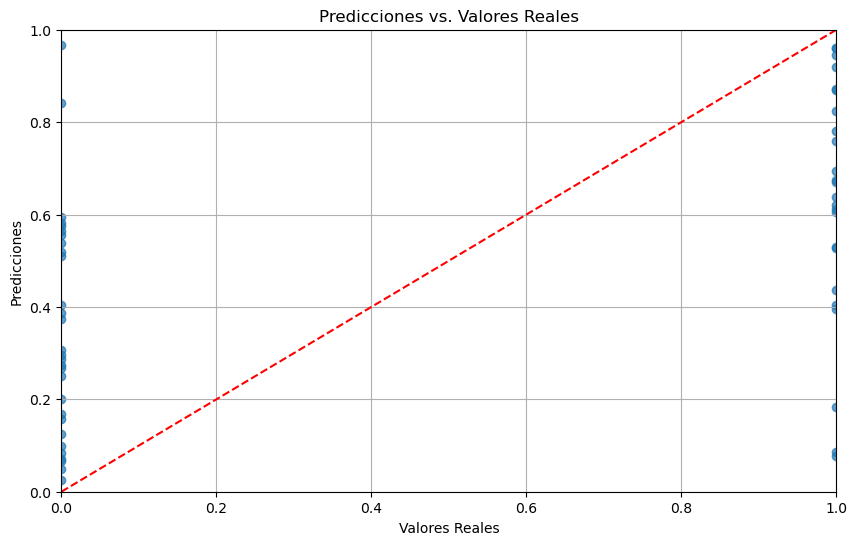

In [11]:
import matplotlib.pyplot as plt

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Crear y ajustar el modelo de regresión logística
modelo_log_reg = LogisticRegression()
modelo_log_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred_log = modelo_log_reg.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_log))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_log))

Matriz de confusión:
[[23  9]
 [ 7 21]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.preprocessing import StandardScaler

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300)  # Aumentar max_iter a 300
modelo_log_reg.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_log = modelo_log_reg.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_log))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_log))

Matriz de confusión:
[[23  9]
 [ 7 21]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Crear y ajustar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300)  # Aumentar max_iter a 300
modelo_log_reg.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_log = modelo_log_reg.predict(X_test_scaled)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular y mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred_log)
print("\nReporte de clasificación:")
print(class_report)

Matriz de confusión:
[[23  9]
 [ 7 21]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [19]:
from sklearn.feature_selection import SelectFromModel

# Separar las características y la variable objetivo
X = heart_df.drop('condition', axis=1)  # Asegúrate de que 'condition' es la variable objetivo
y = heart_df['condition']

# Escalar las características numéricas si no lo has hecho
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar un modelo de regresión logística para la selección de características
modelo_log_reg = LogisticRegression(max_iter=300)
modelo_log_reg.fit(X_scaled, y)

# Utilizar SelectFromModel para obtener las características más relevantes
selector = SelectFromModel(modelo_log_reg, prefit=True)
X_important = selector.transform(X_scaled)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()].tolist()
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
['sex', 'cp', 'thalach', 'ca', 'thal']


In [21]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42, stratify=y
)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (237, 5) (237,)
Dimensiones del conjunto de prueba: (60, 5) (60,)


In [24]:
from sklearn.linear_model import LogisticRegression

# Crear y ajustar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300, C=1.0)  # Puedes ajustar el valor de C según sea necesario
modelo_log_reg.fit(X_train, y_train)

# Verificar los coeficientes del modelo
print("Coeficientes del modelo:", modelo_log_reg.coef_)
print("Intersección del modelo:", modelo_log_reg.intercept_)

Coeficientes del modelo: [[ 0.55376895  0.53258538 -0.03263374  0.94596014  0.7597909 ]]
Intersección del modelo: [1.8921949]


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred_log = modelo_log_reg.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular y mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred_log)
print("\nReporte de clasificación:")
print(class_report)

Matriz de confusión:
[[32  0]
 [ 6 22]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



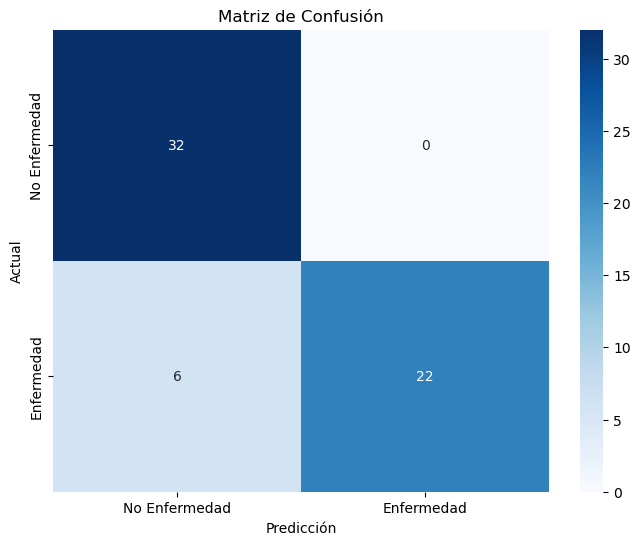

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las características más relevantes
X = heart_df.drop('condition', axis=1)  # Cambiar 'target' por 'condition'
y = heart_df['condition']

# Usar SelectKBest para seleccionar las mejores 5 características
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Obtener las características seleccionadas
features_selected = X.columns[selector.get_support()].tolist()
print("Características seleccionadas:", features_selected)

Características seleccionadas: ['thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [33]:
from sklearn.model_selection import train_test_split

# Filtrar el conjunto de datos original para que solo incluya las características seleccionadas
X_selected_df = heart_df[features_selected]
y_df = heart_df['condition']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y_df, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (237, 5) (237,)
Dimensiones del conjunto de prueba: (60, 5) (60,)


In [35]:
from sklearn.linear_model import LogisticRegression

# Crear y ajustar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300)  # Aumentar max_iter si es necesario
modelo_log_reg.fit(X_train, y_train)

# Ver los coeficientes y la intersección del modelo
print("Coeficientes del modelo:", modelo_log_reg.coef_)
print("Intersección del modelo:", modelo_log_reg.intercept_)

Coeficientes del modelo: [[-0.02994563  0.83984761  0.60605373  1.09336487  1.00154283]]
Intersección del modelo: [1.98305225]


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred_log = modelo_log_reg.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular y mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred_log)
print("\nReporte de clasificación:")
print(class_report)

Matriz de confusión:
[[25  7]
 [ 6 22]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



In [39]:
print(X_test.columns)

Index(['thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


In [53]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv('C:\\Users\\usuario\\OneDrive\\Escritorio\\UNAD UNVERIDAD\\sexto semestres\\Analisis de datos\\Tarea 3\\uci1.csv')

# Mostrar las primeras filas y las columnas del DataFrame
print(df.head())  # Muestra las primeras filas
print(df.columns)  # Muestra las columnas disponibles

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


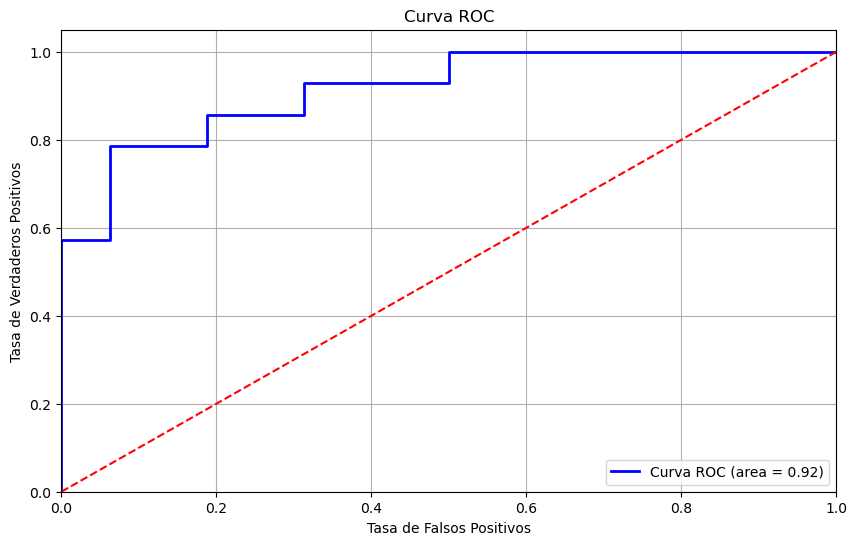

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cargar el DataFrame
df = pd.read_csv('C:\\Users\\usuario\\OneDrive\\Escritorio\\UNAD UNVERIDAD\\sexto semestres\\Analisis de datos\\Tarea 3\\uci1.csv')

# 1. Seleccionar características y variable objetivo
features_selected = ['thalach', 'exang', 'oldpeak', 'ca', 'thal']
X = df[features_selected]  # Las características seleccionadas
y = df['condition']  # Variable objetivo

# 2. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Entrenar el modelo de regresión logística
modelo_log_reg = LogisticRegression()
modelo_log_reg.fit(X_train_scaled, y_train)

# 5. Calcular la probabilidad de las predicciones
y_prob_log = modelo_log_reg.predict_proba(X_test_scaled)[:, 1]

# 6. Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

# 7. Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Optimization terminated successfully.
         Current function value: 0.387798
         Iterations 7


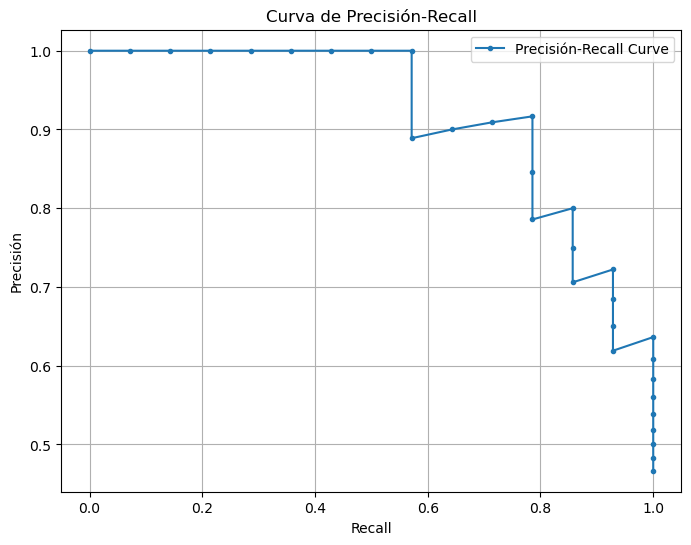

Pseudo R²: 0.4380
Precisión: 0.8000


In [57]:
import statsmodels.api as sm
from sklearn.metrics import precision_score, precision_recall_curve
import matplotlib.pyplot as plt

# Agregar una constante al modelo para el pseudo R²
X_train_const = sm.add_constant(X_train_scaled)

# Ajustar el modelo de regresión logística
modelo_log_reg_sm = sm.Logit(y_train, X_train_const).fit()

# Obtener el pseudo R²
pseudo_r_squared = 1 - (modelo_log_reg_sm.llf / modelo_log_reg_sm.llnull)

# Calcular precisión
y_pred = modelo_log_reg.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)

# Calcular la curva de precisión-recall
precision_values, recall_values, _ = precision_recall_curve(y_test, y_prob_log)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='.', label='Precisión-Recall Curve')
plt.title('Curva de Precisión-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
print(f"Pseudo R²: {pseudo_r_squared:.4f}")
print(f"Precisión: {precision:.4f}")

Error cuadrático medio (MSE): 0.6536995137170021
Coeficiente de determinación (R^2): 0.8072059636181392
Intercepción (b): [4.14291332]
Pendiente (m): [[2.79932366]]


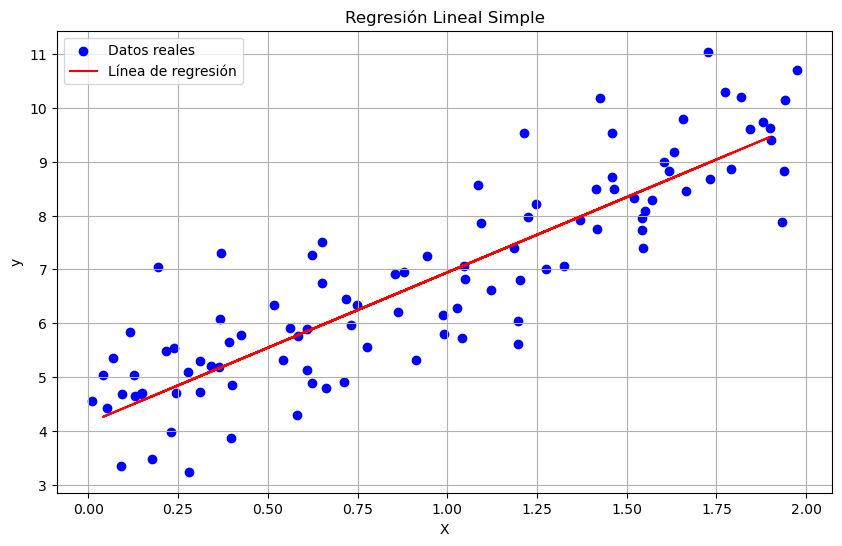

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar un conjunto de datos ficticio
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Característica independiente
y = 4 + 3 * X + np.random.randn(100, 1)  # Variable dependiente con algo de ruido

# Convertir a DataFrame para una mejor manipulación
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)
print("Intercepción (b):", modelo.intercept_)
print("Pendiente (m):", modelo.coef_)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid()
plt.show()

Precisión del modelo: 0.9

Matriz de confusión:
 [[ 8  2]
 [ 0 10]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



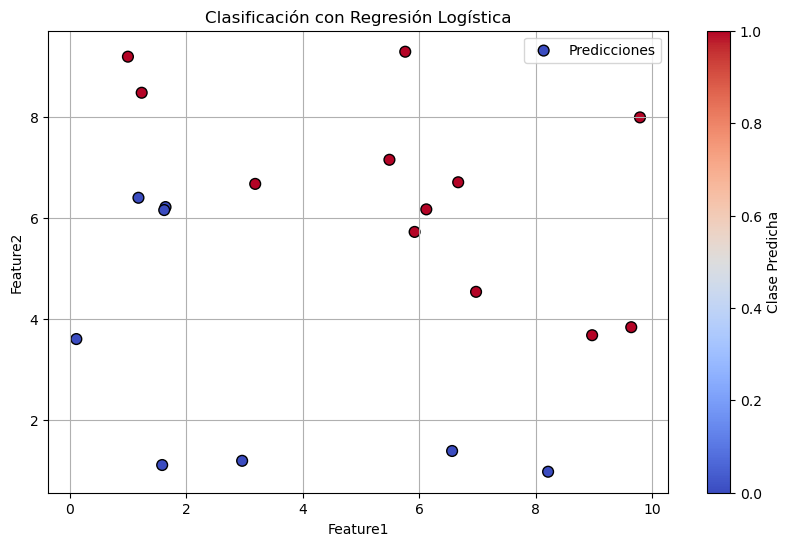

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Generar un conjunto de datos ficticio
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # Dos características independientes
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Etiqueta binaria basada en la suma de las características

# Convertir a DataFrame para una mejor manipulación
data = pd.DataFrame({'Feature1': X[:, 0], 'Feature2': X[:, 1], 'Target': y})

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_log.predict(X_test)
y_prob = modelo_log.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=60, label='Predicciones')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Clasificación con Regresión Logística')
plt.colorbar(label='Clase Predicha')
plt.grid()
plt.legend()
plt.show()